In [1]:
from pandas_datareader import data
import pandas as pd
import numpy as np
import datetime
import pickle
from dateutil.relativedelta import relativedelta
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'

In [2]:
#Yahooから直接データをダウンロードするときにに使う。
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
# tickers = ['SPY', 'DHR','FTV','^N225','GC=F','^IXIC','MDT']

# Define which online source one should use
# data_source = 'yahoo'

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2007-01-01'
end_date = datetime.date.today()
## end_date = '2017-10-01'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
# panel_data = data.DataReader(tickers, data_source, start_date, end_date)

# to load pickled data
# with open('panel_data.pkl','rb') as close:
#     obj = pickle.load(close)

# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
# close = panel_data.loc['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
# close = close.reindex(all_weekdays)

# すでにStockdata Scrapingでデータ入手済みの場合
close = pd.read_csv("StockPractice.csv",index_col=0,parse_dates=[0])
type(close.index[0])

pandas._libs.tslib.Timestamp

In [3]:
close.head(10)

,DHR,FTV,MDT,SPY,^N225
2000-01-03,8.813495,NaN,34.2500,145.437500,NaN
2000-01-04,8.493650,NaN,34.5000,139.750000,19002.859375
2000-01-05,8.588419,NaN,36.6250,140.000000,18542.550781
2000-01-06,8.683188,NaN,38.0000,137.750000,18168.269531
2000-01-07,8.754265,NaN,42.2500,145.750000,18193.410156
2000-01-10,8.931956,NaN,41.9375,146.250000,NaN
2000-01-11,8.706881,NaN,42.1250,144.500000,18850.919922
2000-01-12,8.469958,NaN,42.0625,143.062500,18677.419922
2000-01-13,8.600266,NaN,43.5000,145.000000,18833.289063
2000-01-14,8.600266,NaN,43.8750,146.968704,18956.550781


In [4]:
# panel_data をpickle化
#with open('panel_data.pkl','wb') as f1:
  #  pickle.dump(panel_data,f1)
    
# to load pickled data
# with open('panel_data.pkl','rb') as f:
#     obj = pickle.load(f)

ライブラリインポート
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta

# today
today = date.today()
print(today) # => 2016-04-19

# 1ヶ月後
dt = today + relativedelta(months=1)
print(dt) # => 2016-05-19

# 1年後
dt = today + relativedelta(years=1)
print(dt) # => 2017-04-19

# 月末
dt = today + relativedelta(months=1) - timedelta(days=today.day)
print(dt) # => 2016-04-30

月初（これはtimedeltaで普通にできるけど、一応書いてみる）
dt = today - timedelta(days=today.day-1)
print(dt) # => 2016-04-01

In [5]:
yearbefore = datetime.date.today() + relativedelta(years = -1)
print(yearbefore)

2016-10-12


What does panel_data look like? data.DataReader returns a Panel object, which can be thought of as a 3D matrix. The first dimension consists of the various fields Yahoo Finance returns for a given instrument, namely, the Open, High, Low, Close and Adj Close prices for each date. The second dimension contain the dates. The third one contains the instrument identifiers.

Let's see what panel_data actually is:

In [6]:
#panel_data

# Preparing the Data

Let us assume we are interested in working with the Adj Close prices which have been already been adjusted by Yahoo finance to account for corporate actions such as dividends and stock splits. We want to make sure that all weekdays are included in our dataset, which is very often desirable for quantitative trading strategies. Of course, some of the weekdays might be public holidays in which case no price will be available. For this reason, we will fill the missing prices with the latest available prices. All this is, again, all too easy with pandas:

In [7]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
#adj_close = panel_data.loc['Adj Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016#
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex adj_close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

In [8]:
all_weekdays

DatetimeIndex(['2007-01-01', '2007-01-02', '2007-01-03', '2007-01-04',
               '2007-01-05', '2007-01-08', '2007-01-09', '2007-01-10',
               '2007-01-11', '2007-01-12',
               ...
               '2017-09-29', '2017-10-02', '2017-10-03', '2017-10-04',
               '2017-10-05', '2017-10-06', '2017-10-09', '2017-10-10',
               '2017-10-11', '2017-10-12'],
              dtype='datetime64[ns]', length=2814, freq='B')

Aligning the original DataFrame with the new DatetimeIndex is accomplished by substitution of the initial DatetimeIndex of the adj_close DataFrame. If any of the new dates were not included in the original DatetimeIndex, the prices for that date will be filled with NaNs. For this reason, we will fill any resulting NaNs with the last available price. The final, clean DataFrame is shown below:

In [9]:
close.head(5)

,DHR,FTV,MDT,SPY,^N225
2007-01-01,NaN,NaN,NaN,NaN,NaN
2007-01-02,NaN,NaN,NaN,NaN,NaN
2007-01-03,27.160728,NaN,52.570000,141.369995,NaN
2007-01-04,27.236544,NaN,53.200001,141.669998,17353.669922
2007-01-05,26.933283,NaN,53.360001,140.539993,17091.589844


In [10]:
close.tail(5)

,DHR,FTV,MDT,SPY,^N225
2017-10-06,87.629997,71.550003,79.809998,254.369995,20690.710938
2017-10-09,87.029999,71.900002,76.930000,253.949997,20690.710938
2017-10-10,87.169998,71.919998,77.290001,254.619995,20823.509766
2017-10-11,86.959999,72.349998,78.239998,255.020004,20881.269531
2017-10-12,87.269997,72.309998,77.384697,254.630005,20954.720703


# Looking at the Data
Our dataset is now complete and free of missing values. We can see a summary of the values in each of the instrument by calling the describe() method of a Pandas DataFrame:

In [11]:
close.describe()

,DHR,FTV,MDT,SPY,^N225
count,2812.000000,333.000000,2812.000000,2812.000000,2811.000000
mean,46.707032,58.120360,54.129486,158.134797,13677.452931
std,19.658158,6.390884,17.155258,44.265398,3954.653075
min,18.206974,47.490002,24.379999,68.110001,7054.979980
25%,29.503411,52.730000,38.977500,125.577499,9723.200195
50%,40.322214,57.689999,50.664999,146.174995,13960.049805
75%,63.944275,63.330002,72.072501,199.790001,17136.299805
max,88.449997,72.349998,89.300003,255.020004,20954.720703


Suppose we would like to plot the **MSFT time-series**. We would also like to see how the stock behaves compared to a short and longer term moving average of its price. A simple moving average of the original time-series is calculated by taking for each date the average of the last W prices (including the price on the date of interest). pandas has `rolling()`, a built in function for Series which returns a **rolling object** for a user-defined window, e.g. 20 days. Once a rolling object has been obtained, a number of functions can be applied on it, such as `sum(), std()` (to calculate the standard deviation of the values in the window) or `mean()`. See below:

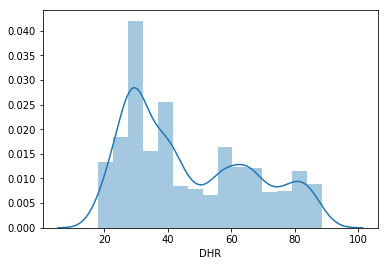

In [12]:
close_DHR = close['DHR'].fillna(0)
sns.distplot(close_DHR[close_DHR > 0], kde=True)

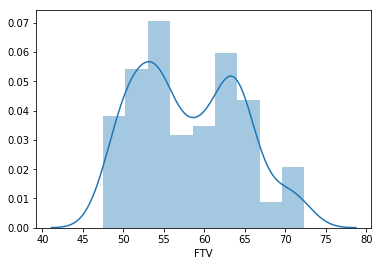

In [13]:
close_FTV = close['FTV'].fillna(0)
sns.distplot(close_FTV[close_FTV >0], kde=True)

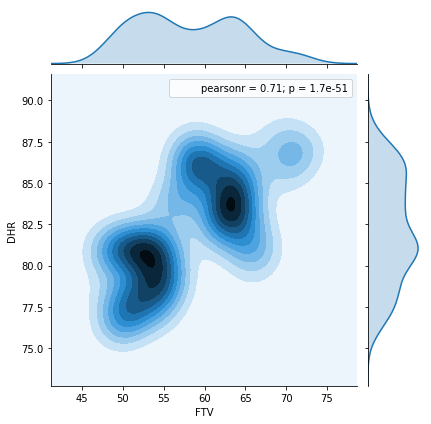

In [22]:
sns.jointplot(close_FTV[close_FTV >0],close_DHR[close_DHR > 0], kind='kde')

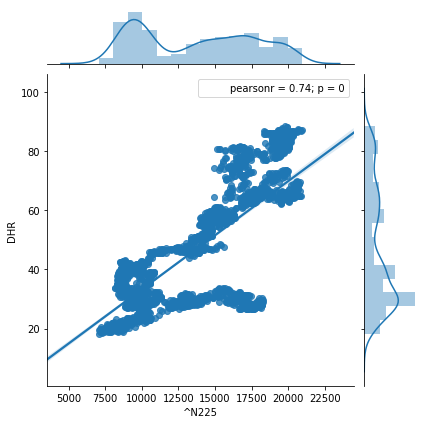

In [21]:
close_N225 = close['^N225'].fillna(0)
sns.jointplot(close_N225[close_N225>0],close_DHR[close_DHR > 0], kind='reg')

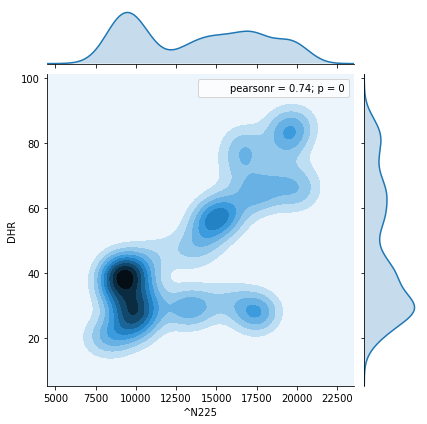

In [20]:
close_N225 = close['^N225'].fillna(0)
sns.jointplot(close_N225[close_N225>0],close_DHR[close_DHR > 0],kind='kde')

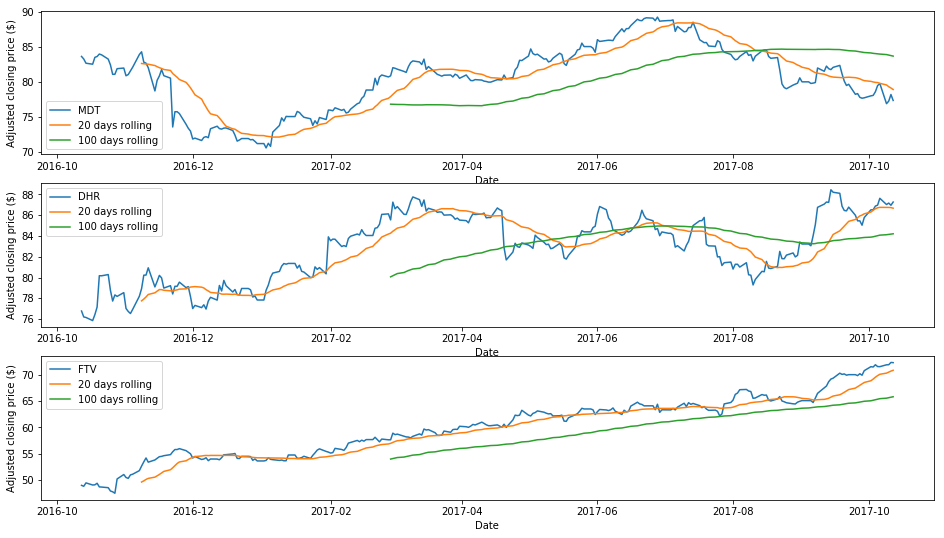

In [23]:
# Get the MSFT time series. This now returns a Pandas Series object indexed by date.
# 1 year chart
mdt = close.loc[yearbefore:, 'MDT']
dhr = close.loc[yearbefore:, 'DHR']
ftv = close.loc[yearbefore:, 'FTV']

# Calculate the 20 and 100 days moving averages of the closing prices

MA_period1 = 20 # moving avarage range 1
MA_period2 = 100 # moving avarage range 2

short_rolling_mdt = mdt.rolling(window=MA_period1).mean()
long_rolling_mdt = mdt.rolling(window=MA_period2).mean()

short_rolling_dhr = dhr.rolling(window=MA_period1).mean()
long_rolling_dhr = dhr.rolling(window=MA_period2).mean()

short_rolling_ftv = ftv.rolling(window=MA_period1).mean()
long_rolling_ftv = ftv.rolling(window=MA_period2).mean()


# Plot everything by leveraging the very powerful matplotlib package
#fig = plt.figure()
fig = plt.figure(figsize=[16,9])

ax = fig.add_subplot(3,1,1)
ax.plot(mdt.index, mdt, label='MDT')
ax.plot(short_rolling_mdt.index, short_rolling_mdt, label= str(MA_period1) + ' days rolling')
ax.plot(long_rolling_mdt.index, long_rolling_mdt, label=str(MA_period2) + ' days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

ax = fig.add_subplot(3,1,2)
ax.plot(dhr.index, dhr, label='DHR')
ax.plot(short_rolling_dhr.index, short_rolling_dhr, label=str(MA_period1) + ' days rolling')
ax.plot(long_rolling_dhr.index, long_rolling_dhr, label=str(MA_period2) + ' days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

ax = fig.add_subplot(3,1,3)
ax.plot(ftv.index, ftv, label='FTV')
ax.plot(short_rolling_ftv.index, short_rolling_ftv, label=str(MA_period1) + ' days rolling')
ax.plot(long_rolling_ftv.index, long_rolling_ftv, label=str(MA_period2) + ' days rolling')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()


# EMA rolling average

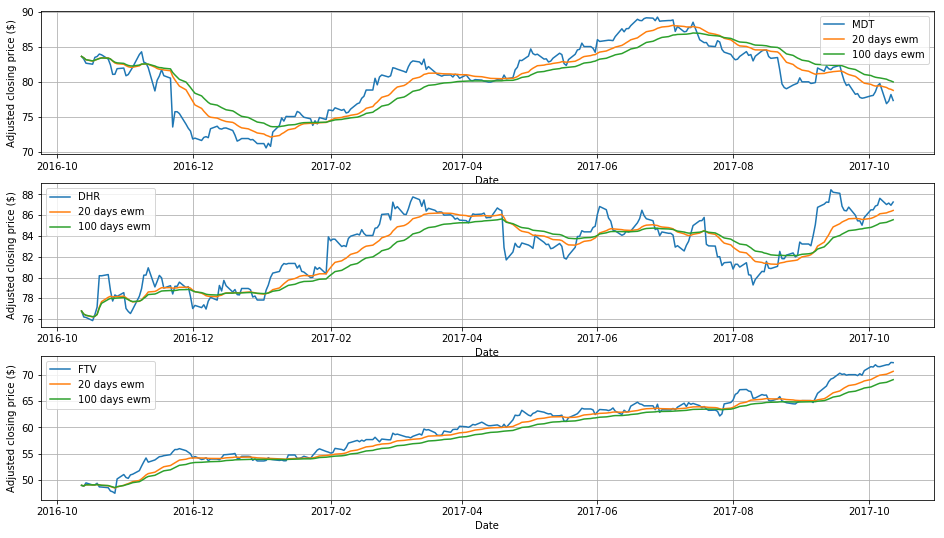

In [24]:

# Get the MSFT time series. This now returns a Pandas Series object indexed by date.
# 1 year chart
mdt = close.loc[yearbefore:, 'MDT']
dhr = close.loc[yearbefore:, 'DHR']
ftv = close.loc[yearbefore:, 'FTV']

# Calculate the 20 and 100 days moving averages of the closing prices

EMA_period1 = 20 # moving avarage range 1
EMA_period2 = 40 # moving avarage range 2

short_ewm_mdt = mdt.ewm(span=EMA_period1).mean()
long_ewm_mdt = mdt.ewm(span=EMA_period2).mean()

short_ewm_dhr = dhr.ewm(span=EMA_period1).mean()
long_ewm_dhr = dhr.ewm(span=EMA_period2).mean()

short_ewm_ftv = ftv.ewm(span=EMA_period1).mean()
long_ewm_ftv = ftv.ewm(span=EMA_period2).mean()


# Plot everything by leveraging the very powerful matplotlib package
#fig = plt.figure()
fig = plt.figure (figsize=[16,9])

ax = fig.add_subplot(3,1,1)
ax.plot(mdt.index, mdt, label='MDT')
ax.plot(short_ewm_mdt.index, short_ewm_mdt, label= str(MA_period1) + ' days ewm')
ax.plot(long_ewm_mdt.index, long_ewm_mdt, label=str(MA_period2) + ' days ewm')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
ax.grid()

ax = fig.add_subplot(3,1,2)
ax.plot(dhr.index, dhr, label='DHR')
ax.plot(short_ewm_dhr.index, short_ewm_dhr, label= str(MA_period1) + ' days ewm')
ax.plot(long_ewm_dhr.index, long_ewm_dhr, label=str(MA_period2) + ' days ewm')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
ax.grid()

ax = fig.add_subplot(3,1,3)
ax.plot(ftv.index, ftv, label='FTV')
ax.plot(short_ewm_ftv.index, short_ewm_ftv, label= str(MA_period1) + ' days ewm')
ax.plot(long_ewm_ftv.index, long_ewm_ftv, label=str(MA_period2) + ' days ewm')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
ax.grid()




# ボリンジャーバンド Bolinger Band
ボリンジャーバンドは、SMAの上下に標準偏差を何倍かをプラスマイナスしたラインを引きます。SMAは前述のようにrolling().mean()で算出されます。標準偏差もメソッド関数が用意されていて、std()を呼ぶだけです。ただし、サンプル数での標準偏差を取るためにddof=0というパラメータを付けておきます。

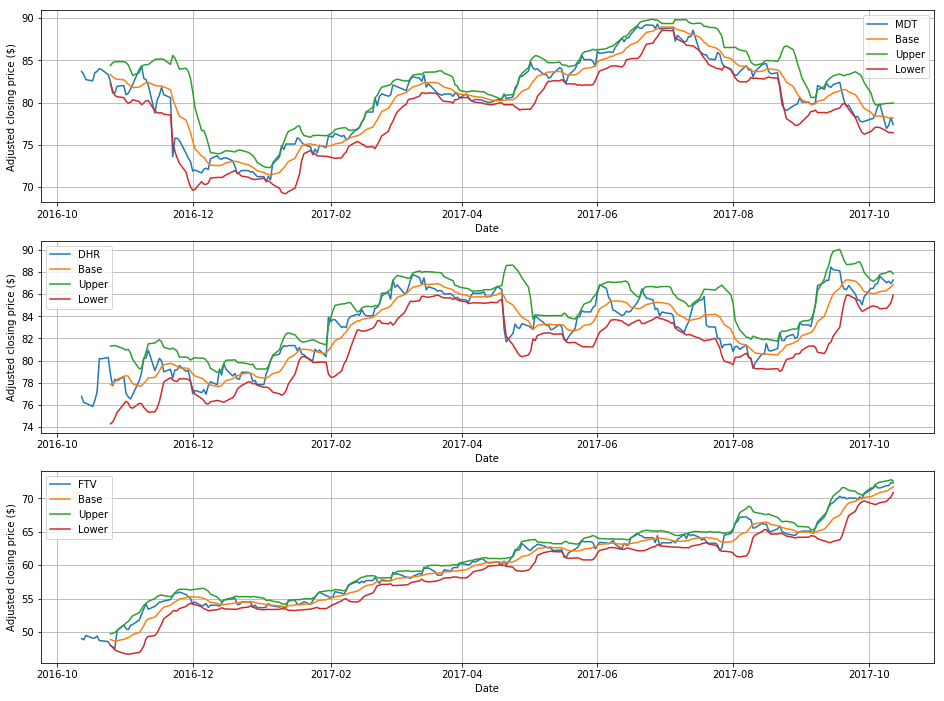

In [25]:
#Bolinger Band
Bands_period = 10 #期間
Deviation = 2 #偏差の倍率

mdt = close.loc[yearbefore:, 'MDT']
dhr = close.loc[yearbefore:, 'DHR']
ftv = close.loc[yearbefore:, 'FTV']

fig = plt.figure (figsize=[16,12])

# --------MDT----------
mdt_Base = mdt.rolling(Bands_period).mean()
mdt_sigma = mdt.rolling(Bands_period).std(ddof=0)
mdt_Upper = mdt_Base+mdt_sigma*Deviation
mdt_Lower = mdt_Base-mdt_sigma*Deviation
# mdt_Base,mdt_sigma,mdt_Upper,mdt_Lower

ax = fig.add_subplot(3,1,1)
ax.plot(mdt.index, mdt, label='MDT')
ax.plot(mdt_Base.index, mdt_Base, label= 'Base')
ax.plot(mdt_Upper.index, mdt_Upper, label= 'Upper')
ax.plot(mdt_Lower.index, mdt_Lower, label= 'Lower')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
ax.grid()

# --------DHR----------
dhr_Base = dhr.rolling(Bands_period).mean()
dhr_sigma = dhr.rolling(Bands_period).std(ddof=0)
dhr_Upper = dhr_Base+dhr_sigma*Deviation
dhr_Lower = dhr_Base-dhr_sigma*Deviation

ax = fig.add_subplot(3,1,2)
ax.plot(dhr.index, dhr, label='DHR')
ax.plot(dhr_Base.index, dhr_Base, label= 'Base')
ax.plot(dhr_Upper.index, dhr_Upper, label= 'Upper')
ax.plot(dhr_Lower.index, dhr_Lower, label= 'Lower')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
ax.grid()

# --------FTV----------
ftv_Base = ftv.rolling(Bands_period).mean()
ftv_sigma = ftv.rolling(Bands_period).std(ddof=0)
ftv_Upper = ftv_Base+ftv_sigma*Deviation
ftv_Lower = ftv_Base-ftv_sigma*Deviation

ax = fig.add_subplot(3,1,3)
ax.plot(ftv.index, ftv, label='FTV')
ax.plot(ftv_Base.index, ftv_Base, label= 'Base')
ax.plot(ftv_Upper.index, ftv_Upper, label= 'Upper')
ax.plot(ftv_Lower.index, ftv_Lower, label= 'Lower')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
ax.grid()



#pd.DataFrame({'Close': mdt('close'), 'Upper': mdt('Upper'), 'Base': mdt('Base'), 'Lower': mdt('Lower')},
 #           columns=['Close', 'Upper', 'Base', 'Lower']).plot(figsize=(8,6))


# RSI
RSIは一定期間の上昇分と下降分を平滑化して、その比を0から100の範囲で表したものです。今までのテクニカル指標に比べると、ちょっと複雑ですが、やはりメソッド関数をうまく使うと簡単に書けます。

まず、前日との差をdiff()関数で算出します。そして、そのなかで上昇した分（正の値）だけを取り出すために、一定値以下をクリップするclip_lower()関数を使います。これで、プラスだけの系列ができます。同様にclip_upper()関数を使うと、マイナスだけの系列ができます。さらにそれぞれの系列を、前述のSMMAと同じ方法で平滑化します。最後に比を取って範囲を調整して終わりです。思ったより簡単にできました。
```
In [14]:
#RSI
RSI_period = 14
diff = close.diff(1)
positive = diff.clip_lower(0).ewm(alpha=1/RSI_period).mean()
negative = diff.clip_upper(0).ewm(alpha=1/RSI_period).mean()
RSI = 100-100/(1-positive/negative)
RSI
```

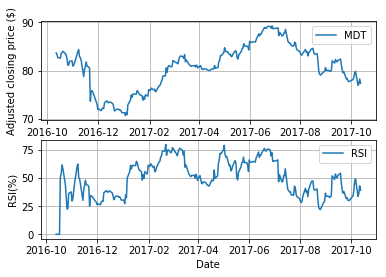

In [26]:
#RSI
RSI_period = 14

mdt_diff = mdt.diff(1)
mdt_positive = mdt_diff.clip_lower(0).ewm(alpha=1/RSI_period).mean()
mdt_negative = mdt_diff.clip_upper(0).ewm(alpha=1/RSI_period).mean()
mdt_RSI = 100-100/(1-mdt_positive/mdt_negative)
mdt_RSI

fig = plt.figure()

# --------MDT----------
ax = fig.add_subplot(2,1,1)
ax.plot(mdt.index, mdt, label='MDT')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
ax.grid()

ax = fig.add_subplot(2,1,2)
ax.plot(mdt_RSI.index, mdt_RSI, label= 'RSI')
ax.set_xlabel('Date')
ax.set_ylabel('RSI(%)')
ax.legend()
ax.grid()




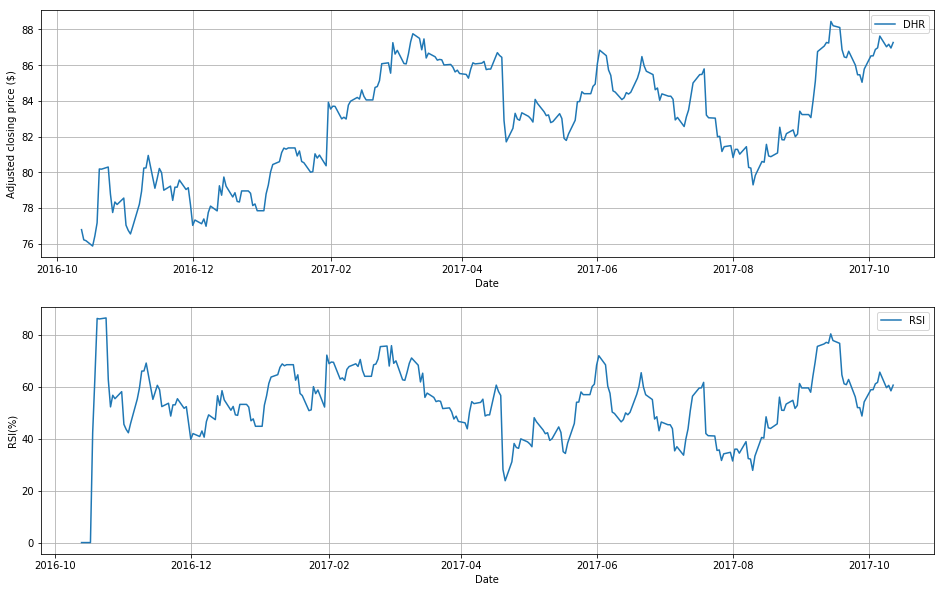

In [30]:
# --------DHR----------

dhr_diff = dhr.diff(1)
dhr_positive = dhr_diff.clip_lower(0).ewm(alpha=1/RSI_period).mean()
dhr_negative = dhr_diff.clip_upper(0).ewm(alpha=1/RSI_period).mean()
dhr_RSI = 100-100/(1-dhr_positive/dhr_negative)
dhr_RSI

fig = plt.figure(figsize=[16,10])

ax = fig.add_subplot(2,1,1)
ax.plot(dhr.index, dhr, label='DHR')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
ax.grid()

ax = fig.add_subplot(2,1,2)
ax.plot(dhr_RSI.index, dhr_RSI, label= 'RSI')
ax.set_xlabel('Date')
ax.set_ylabel('RSI(%)')
ax.legend()
ax.grid()

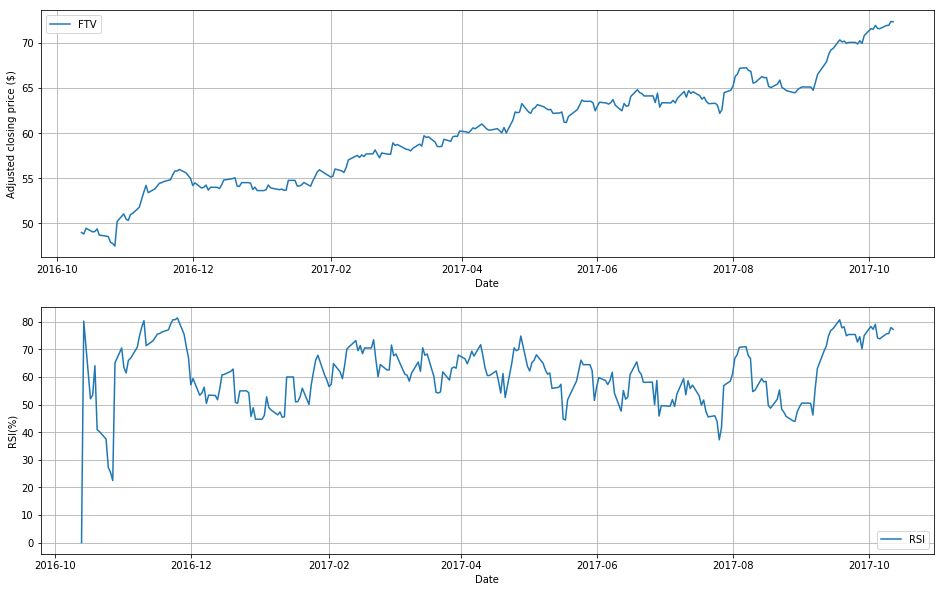

In [31]:
# --------FTV----------

ftv_diff = ftv.diff(1)
ftv_positive = ftv_diff.clip_lower(0).ewm(alpha=1/RSI_period).mean()
ftv_negative = ftv_diff.clip_upper(0).ewm(alpha=1/RSI_period).mean()
ftv_RSI = 100-100/(1-ftv_positive/ftv_negative)
ftv_RSI

fig = plt.figure(figsize=[16,10])

ax = fig.add_subplot(2,1,1)
ax.plot(ftv.index, ftv, label='FTV')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
ax.grid()

ax = fig.add_subplot(2,1,2)
ax.plot(ftv_RSI.index, ftv_RSI, label= 'RSI')
ax.set_xlabel('Date')
ax.set_ylabel('RSI(%)')
ax.legend()
ax.grid()

# ストキャスティックス
一定期間の最高値と最安値のバンドのなかで、現在の価格がどのあたりになるかというのを0から100の範囲で示したものです。まず、HLバンドと同じくKperiodの期間で最高値と最安値を求めます。そして、バンドの幅と終値の位置をslowingの期間で平滑化します。ここでは、後で比を取るので、平均ではなく、sum()で総和を取っています。最後に比をとったものをストキャスティックスのメインのラインとします。さらにシグナルのラインは、Dperiodの期間でSMAを取ります。

```
#Stochastics
Kperiod = 14 #%K期間
Dperiod = 3  #%D期間
Slowing = 3  #平滑化期間
Hline = high.rolling(Kperiod).max()
Lline = low.rolling(Kperiod).min()
sumlow = (close-Lline).rolling(Slowing).sum()
sumhigh = (Hline-Lline).rolling(Slowing).sum()
Stoch = sumlow/sumhigh*100
Signal = Stoch.rolling(Dperiod).mean()
Stoch,Signal
```

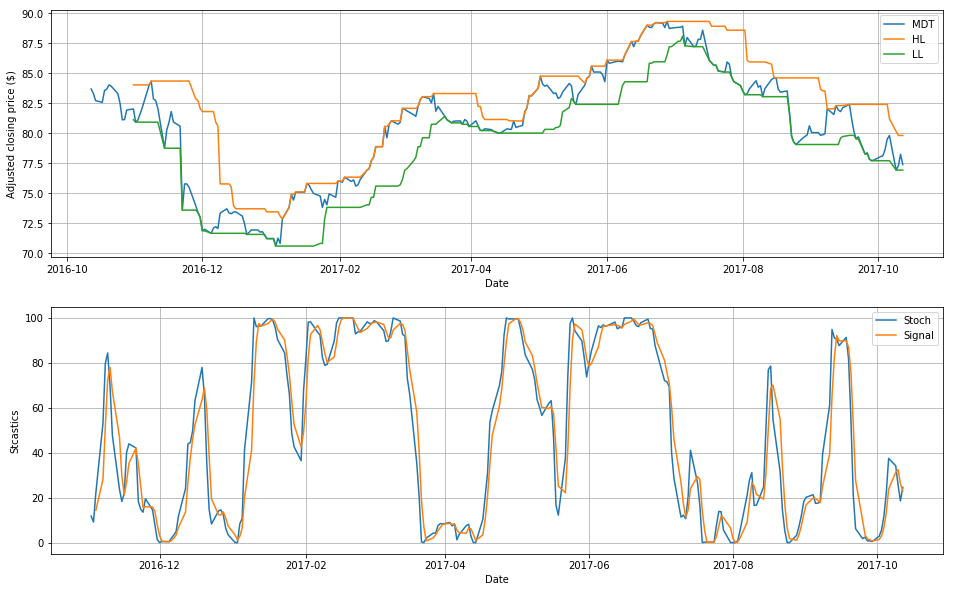

In [29]:
#Stochastics --MDT--

mdt = close.loc[yearbefore:, 'MDT']


Kperiod = 14 #%K期間
Dperiod = 3  #%D期間
Slowing = 3  #平滑化期間

Hline = mdt.rolling(Kperiod).max()
Lline = mdt.rolling(Kperiod).min()
#Hline, Lline
sumlow = (mdt-Lline).rolling(Slowing).sum()
sumhigh = (Hline-Lline).rolling(Slowing).sum()
Stoch = sumlow/sumhigh*100
Signal = Stoch.rolling(Dperiod).mean()
#Stoch,Signal

fig = plt.figure(figsize=[16,10])

# --------MDT----------
ax = fig.add_subplot(2,1,1)
ax.plot(mdt.index, mdt, label='MDT')
ax.plot(Hline.index, Hline, label='HL')
ax.plot(Lline.index, Lline, label='LL')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
ax.grid()

ax = fig.add_subplot(2,1,2)
ax.plot(Stoch.index, Stoch, label= 'Stoch')
ax.plot(Signal.index, Signal, label= 'Signal')
ax.set_xlabel('Date')
ax.set_ylabel('Stcastics')
ax.legend()
ax.grid()

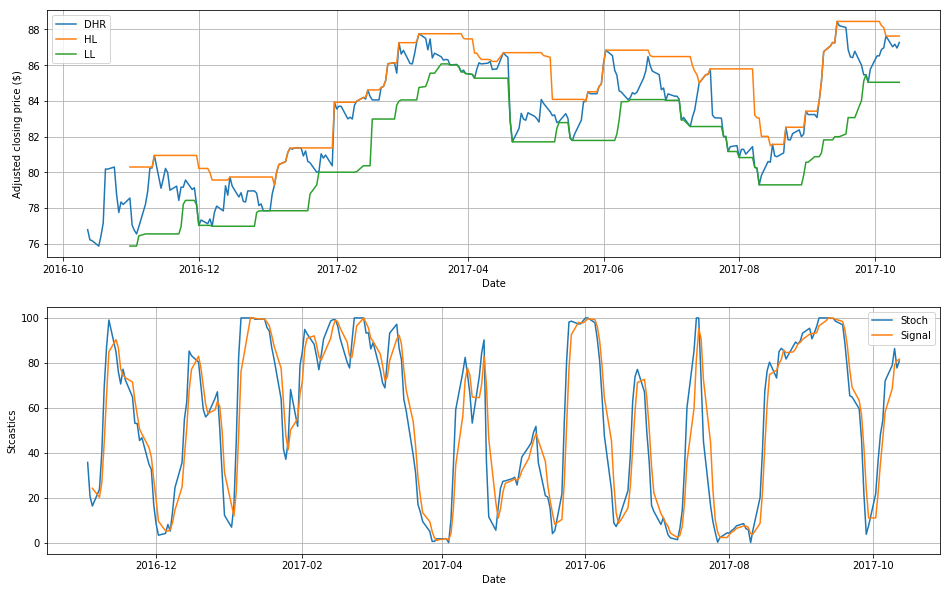

In [32]:
#Stochastics --DHR--

dhr = close.loc[yearbefore:, 'DHR']


Kperiod = 14 #%K期間
Dperiod = 3  #%D期間
Slowing = 3  #平滑化期間

Hline = dhr.rolling(Kperiod).max()
Lline = dhr.rolling(Kperiod).min()
#Hline, Lline
sumlow = (dhr-Lline).rolling(Slowing).sum()
sumhigh = (Hline-Lline).rolling(Slowing).sum()
Stoch = sumlow/sumhigh*100
Signal = Stoch.rolling(Dperiod).mean()
#Stoch,Signal

fig = plt.figure(figsize=[16,10])

# --------dhr----------
ax = fig.add_subplot(2,1,1)
ax.plot(dhr.index, dhr, label='DHR')
ax.plot(Hline.index, Hline, label='HL')
ax.plot(Lline.index, Lline, label='LL')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
ax.grid()

ax = fig.add_subplot(2,1,2)
ax.plot(Stoch.index, Stoch, label= 'Stoch')
ax.plot(Signal.index, Signal, label= 'Signal')
ax.set_xlabel('Date')
ax.set_ylabel('Stcastics')
ax.legend()
ax.grid()

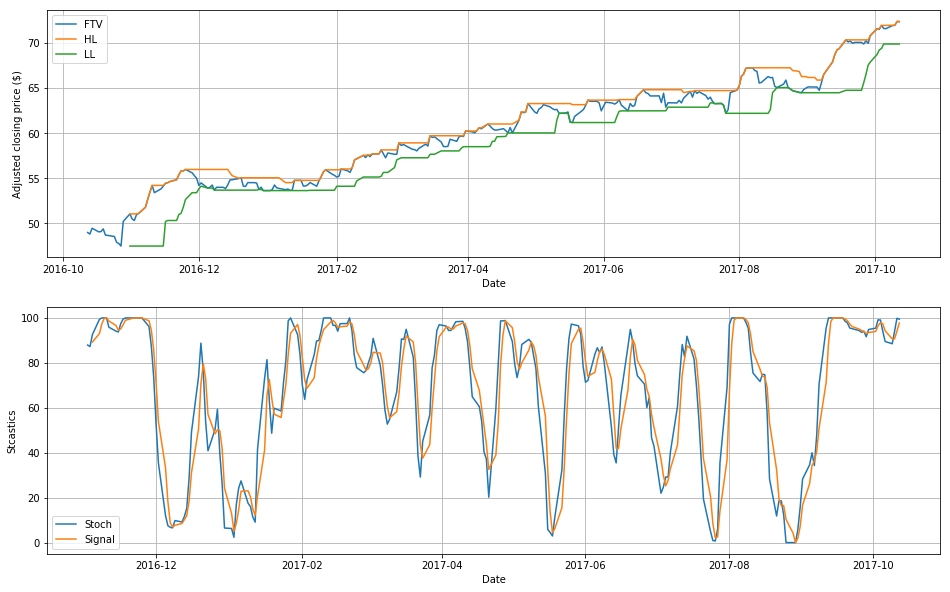

In [33]:
#Stochastics --FTV--

ftv = close.loc[yearbefore:, 'FTV']


Kperiod = 14 #%K期間
Dperiod = 3  #%D期間
Slowing = 3  #平滑化期間

Hline = ftv.rolling(Kperiod).max()
Lline = ftv.rolling(Kperiod).min()
#Hline, Lline
sumlow = (ftv-Lline).rolling(Slowing).sum()
sumhigh = (Hline-Lline).rolling(Slowing).sum()
Stoch = sumlow/sumhigh*100
Signal = Stoch.rolling(Dperiod).mean()
#Stoch,Signal

fig = plt.figure(figsize=[16,10])

# --------ftv----------
ax = fig.add_subplot(2,1,1)
ax.plot(ftv.index, ftv, label='FTV')
ax.plot(Hline.index, Hline, label='HL')
ax.plot(Lline.index, Lline, label='LL')
ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()
ax.grid()

ax = fig.add_subplot(2,1,2)
ax.plot(Stoch.index, Stoch, label= 'Stoch')
ax.plot(Signal.index, Signal, label= 'Signal')
ax.set_xlabel('Date')
ax.set_ylabel('Stcastics')
ax.legend()
ax.grid()

# Pickle
Python標準モジュールのPickleを用いることで任意のPythonオブジェクトをPickle/Unpickle (保存/読み込み)することができる

```
data = pd.read_pickle('./data.pkl')
data.head(10)
```

In [34]:
data = close.iloc[:,0:3]
data.head(10)

,DHR,FTV,MDT
2007-01-01,NaN,NaN,NaN
2007-01-02,NaN,NaN,NaN
2007-01-03,27.160728,NaN,52.570000
2007-01-04,27.236544,NaN,53.200001
2007-01-05,26.933283,NaN,53.360001
2007-01-08,27.175890,NaN,53.700001
2007-01-09,27.532221,NaN,53.849998
2007-01-10,27.725550,NaN,54.209999
2007-01-11,27.934040,NaN,53.950001
2007-01-12,27.865807,NaN,53.720001


We have also calculated the rolling moving averages of these three timeseries as follows. Note that when calculating the MM days moving average, the first M−1M−1 are not valid, as MM prices are required for the first moving average data point.

In [35]:
# Calculating the short-window moving average
short_rolling = data.rolling(window=20).mean()
short_rolling.tail()

,DHR,FTV,MDT
2017-10-06,86.756999,70.100500,79.838000
2017-10-09,86.754999,70.319501,79.606500
2017-10-10,86.749999,70.522000,79.356000
2017-10-11,86.735999,70.705000,79.171500
2017-10-12,86.676999,70.861000,78.950735


In [36]:
# Calculating the short-window moving average
long_rolling = data.rolling(window=100).mean()
long_rolling.tail()

,DHR,FTV,MDT
2017-10-06,84.0830,65.4659,84.017600
2017-10-09,84.1242,65.5609,83.947000
2017-10-10,84.1564,65.6540,83.873800
2017-10-11,84.1864,65.7467,83.809200
2017-10-12,84.2140,65.8334,83.727247


General considerations about trading strategies
There are several ways one can go about when a trading strategy is to be developed. One approach would be to use the price time-series directly and work with numbers that correspond to some monetary value. For example, a researcher could be working with time-series expressing the price of a given stock, like the time-series we used in the previous article. Similarly, if working with fixed income instruments, e.g. bonds, one could be using a time-series expressing the price of the bond as a percentage of a given reference value, in this case the par value of the bond. Working with this type of time-series can be more intuitive as people are used to thinking in terms of prices. However, price time-series have some drawbacks. Prices are usually only positive, which makes it harder to use models and approaches which require or produce negative numbers. In addition, price time-series are usually non-stationary, that is their statistical properties are less stable over time.

An alternative approach is to use time-series which correspond not to actual values but changes in the monetary value of the asset. These time-series can and do assume negative values and also, their statistical properties are usually more stable than the ones of price time-series. The most frequently used forms used are relative returns defined as

rrelative(t)=p(t)–p(t−1)p(t−1)
rrelative(t)=p(t)–p(t−1)p(t−1)
and log-returns defined as

r(t)=log(p(t)p(t−1))
r(t)=log⁡(p(t)p(t−1))
where p(t)p(t) is the price of the asset at time tt. For example, if p(t)=101p(t)=101 and p(t−1)=100p(t−1)=100 then rrelative(t)=101–100100=1%rrelative(t)=101–100100=1%.

There are several reasons why log-returns are being used in the industry and some of them are related to long-standing assumptions about the behaviour of asset returns and are out of our scope. However, what we need to point out are two quite interesting properties. Log-returns are additive and this facilitates treatment of our time-series, relative returns are not. We can see the additivity of log-returns in the following equation.

r(t1)+r(t2)=log(p(t1)p(t0))+log(p(t2)p(t1))=log(p(t2)p(t0))
r(t1)+r(t2)=log⁡(p(t1)p(t0))+log⁡(p(t2)p(t1))=log⁡(p(t2)p(t0))
which is simply the log-return from t0t0 to t2t2. Secondly, log-returns are approximately equal to the relative returns for values of p(t)p(t−1)p(t)p(t−1) sufficiently close to 11. By taking the 1st order Taylor expansion of log(p(t)p(t−1))log⁡(p(t)p(t−1)) around 11, we get

log(p(t)p(t−1))≃log(1)+p(t)p(t−1)–1=rrelative(t)
log⁡(p(t)p(t−1))≃log⁡(1)+p(t)p(t−1)–1=rrelative(t)
Both of these are trivially calculated using Pandas as:

In [37]:
# Relative returns
returns = data.pct_change(1)
returns.head()

,DHR,FTV,MDT
2007-01-01,NaN,NaN,NaN
2007-01-02,NaN,NaN,NaN
2007-01-03,NaN,NaN,NaN
2007-01-04,0.002791,NaN,0.011984
2007-01-05,-0.011134,NaN,0.003008


In [38]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
log_returns = np.log(data).diff()
log_returns.head()

,DHR,FTV,MDT
2007-01-01,NaN,NaN,NaN
2007-01-02,NaN,NaN,NaN
2007-01-03,NaN,NaN,NaN
2007-01-04,0.002787,NaN,0.011913
2007-01-05,-0.011197,NaN,0.003003


Since log-returns are additive, we can create the time-series of cumulative log-returns defined as

c(t)=∑k=1tr(t)
c(t)=∑k=1tr(t)
The cumulative log-returns and the total relative returns from 2000/01/01 for the three time-series can be seen below. Note that although log-returns are easy to manipulate, investors are accustomed to using relative returns. For example, a log-return of 11 does not mean an investor has doubled the value of his portfolio. A relative return of 1=100%1=100% does! Converting between the cumulative log-return c(t)c(t) and the total relative return crelative(t)=p(t)–p(to)p(to)crelative(t)=p(t)–p(to)p(to) is simple
crelative(t)=ec(t)–1
crelative(t)=ec(t)–1
For those who are wondering if this is correct, yes it is. If someone had bought $1000$1000 worth of AAPL shares in January 2000, her/his portfolio would now be worth over $30,000$30,000. If only we had a time machine…

(-0.25, 0.25)

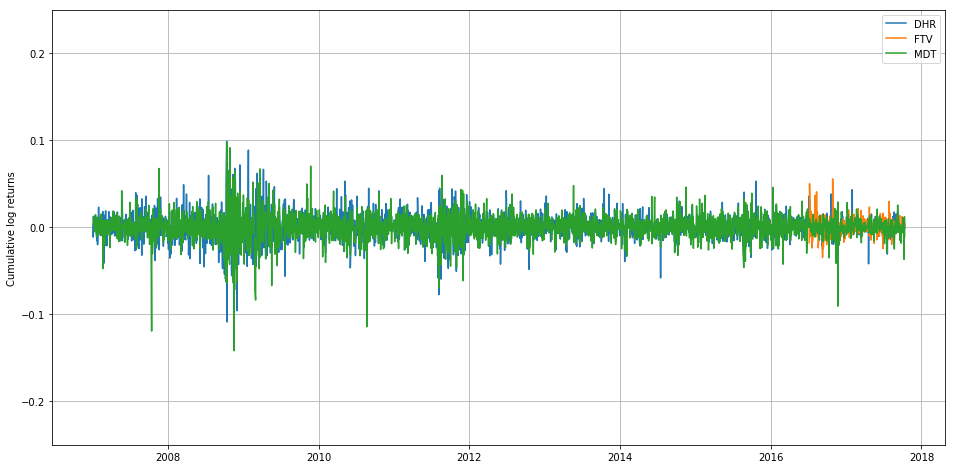

In [39]:
fig = plt.figure(figsize=[16,8])

ax = fig.add_subplot(1,1,1)

for c in log_returns:
    ax.plot(log_returns.index, log_returns[c], label=str(c))

ax.set_ylabel('Cumulative log returns')
ax.legend(loc='best')
ax.grid()
plt.ylim(-0.25, 0.25)

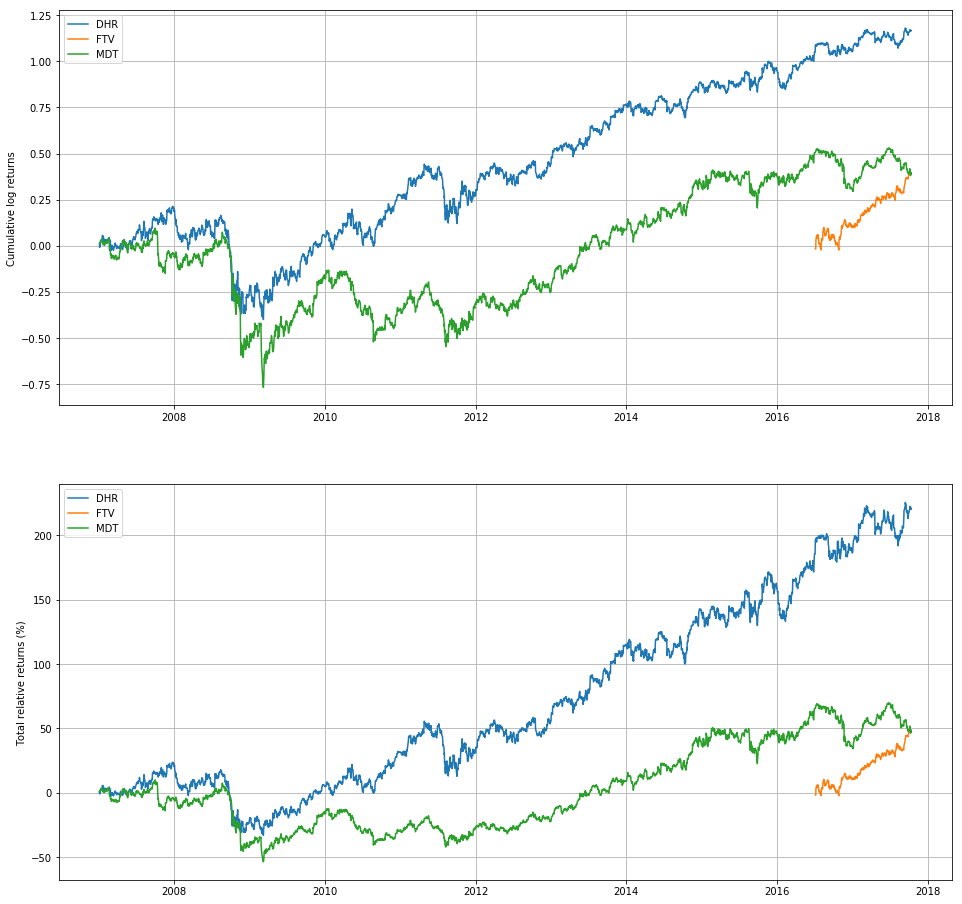

In [40]:
fig = plt.figure(figsize=[16,16])

ax = fig.add_subplot(2,1,1)

for c in log_returns:
    ax.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax.set_ylabel('Cumulative log returns')
ax.legend(loc='best')
ax.grid()

ax = fig.add_subplot(2,1,2)

for c in log_returns:
    ax.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax.set_ylabel('Total relative returns (%)')
ax.legend(loc='best')
ax.grid()

#plt.show()

In [41]:
# Last day returns. Make this a column vector
r_t = log_returns.tail(1).transpose()
r_t

,2017-10-12 00:00:00
DHR,0.003558
FTV,-0.000553
MDT,-0.010992


In [42]:
# Weights as defined above
weights_vector = pd.DataFrame(1 / 3, index=r_t.index, columns=r_t.columns)
weights_vector

,2017-10-12 00:00:00
DHR,0.333333
FTV,0.333333
MDT,0.333333


In [43]:
# Total log_return for the portfolio is:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

,2017-10-12 00:00:00
2017-10-12,-0.002662


In [44]:
weights_matrix = pd.DataFrame(1 / 3, index=data.index, columns=data.columns)
weights_matrix.tail()

,DHR,FTV,MDT
2017-10-06,0.333333,0.333333,0.333333
2017-10-09,0.333333,0.333333,0.333333
2017-10-10,0.333333,0.333333,0.333333
2017-10-11,0.333333,0.333333,0.333333
2017-10-12,0.333333,0.333333,0.333333


In [45]:
# Matrix RR is simply our log-returns dataframe defined before.
log_returns.head()

,DHR,FTV,MDT
2007-01-01,NaN,NaN,NaN
2007-01-02,NaN,NaN,NaN
2007-01-03,NaN,NaN,NaN
2007-01-04,0.002787,NaN,0.011913
2007-01-05,-0.011197,NaN,0.003003


In [46]:
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.tail().iloc[:, 0:5]

,2007-01-01 00:00:00,2007-01-02 00:00:00,2007-01-03 00:00:00,2007-01-04 00:00:00,2007-01-05 00:00:00
2017-10-06,NaN,NaN,NaN,NaN,NaN
2017-10-09,NaN,NaN,NaN,NaN,NaN
2017-10-10,NaN,NaN,NaN,NaN,NaN
2017-10-11,NaN,NaN,NaN,NaN,NaN
2017-10-12,NaN,NaN,NaN,NaN,NaN


In [47]:
# The numpy np.diag function is used to extract the diagonal and then
# a Series is constructed using the time information from the log_returns index
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

2017-10-06    0.003682
2017-10-09   -0.012915
2017-10-10    0.002185
2017-10-11    0.005255
2017-10-12   -0.002662
Freq: B, dtype: float64

Note that these returns are only estimates because of our use of log-returns instead of relative returns. However, for most practical purposes the difference is negligible. Let us see what our cumulative log returns and the total relative returns for this portfolio look.

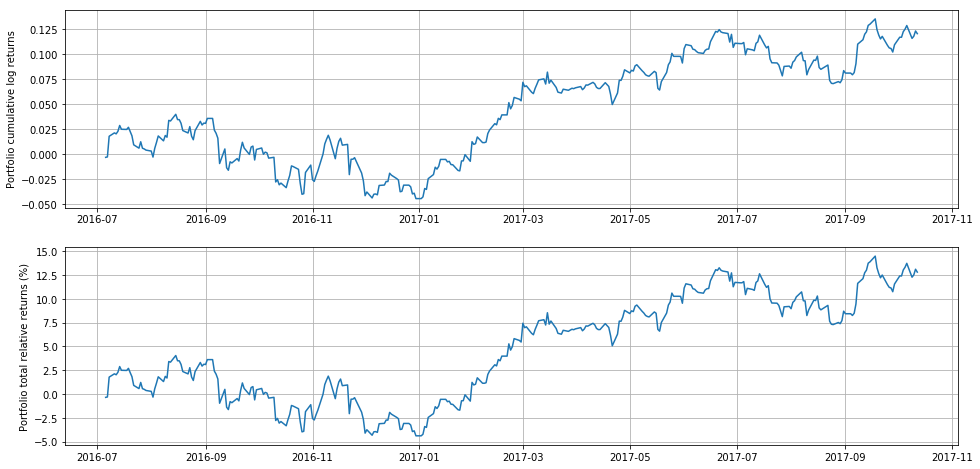

In [48]:
total_relative_returns = (np.exp(portfolio_log_returns.cumsum()) - 1)

fig = plt.figure(figsize=[16,8])
ax = fig.add_subplot(2, 1, 1)
ax.plot(portfolio_log_returns.index, portfolio_log_returns.cumsum())
ax.set_ylabel('Portfolio cumulative log returns')
ax.grid()
ax = fig.add_subplot(2, 1, 2)
ax.plot(total_relative_returns.index, 100 * total_relative_returns)
ax.set_ylabel('Portfolio total relative returns (%)')
ax.grid()
plt.show()

How does this translate to a yearly performance? Since we have kept all weekdays in our portfolio, there are 52×5=26052×5=260 weekdays each year. There are 44354435 days in our simulation which corresponds roughly to 16.9216.92 years. We will be calculating the average geometric return, that is an average return r¯r¯ which when compounded for 16.9216.92 years will produce the total relative return of 325.14%325.14%. So we need to solve:

(1+r¯)16.92=1+3.2514

In [49]:
# Calculating the time-related parameters of the simulation
days_per_year = 52 * 5
total_days_in_simulation = data.shape[0]
number_of_years = total_days_in_simulation / days_per_year
print(number_of_years)

# The last data point will give us the total portfolio return
total_portfolio_return = total_relative_returns[-1]
# Average portfolio return assuming compunding of returns
average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1

print('Total portfolio return is: ' +
      '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
      '{:5.2f}'.format(100 * average_yearly_return) + '%')

10.823076923076924
Total portfolio return is: 12.81%
Average yearly return is:  1.12%


# What next?
Our strategy is a very simple example of a buy-and-hold strategy. The investor simply splits up the available funds in the three assets and keeps the same position throughout the period under investigation. Although simple, the strategy does produce a healthy 8.85%8.85% per year.

However, the simulation is not completely accurate. Let us not forget that we have used ALL weekdays in our example, but we do know that on some days the markets are not trading. This will not affect the strategy we presented as the returns on the days the markets are closed are 0, but it may potentially affect other types of strategies. Furthermore, the weights here are constant over time. Ideally, we would like weights that change over time so that we can take advantage of price swings and other market events.

Also, we have said nothing at all about the risk of this strategy. Risk is the most important consideration in any investment strategy and is closely related to the expected returns. In what follows, we will start designing a more complex strategy, the weights of which will not be constant over time. At the same time we will start looking into the risk of the strategy and present appropriate metrics to measure it. Finally, we will look into the issue of optimizing the strategy parameters and how this can improve our return to risk profile.